In [1]:
import numpy as np
from matplotlib import pyplot as plt
import xarray as xr
import pickle
%matplotlib inline
import scipy.stats
import os

In [2]:
minfigsize = np.array([95,115])*0.0393701
maxfigsize = np.array([190,230])*0.0393701
plt.rc('font', size=8)
def rms(xx,xa):
    ss = xx-xa
    ss = ss**2
    ss = ss.sum(axis=0)
    ss = ss/40
    ss = np.sqrt(ss)
    return(ss)

In [4]:
#Table 2
def maketable2():
    os.chdir('..')
    vals = []
    with open('Sensitivity/base.pickle','rb') as f:
        s = pickle.load(f)
    vals.append("{:.2f}".format(100*float(rms(s.ds.xx,s.ds.xaens.mean(axis=1)).mean()/s.r)))

    for i in range(1,4):
        with open('Sensitivity/s'+str(i)+'.pickle','rb') as f:
            s = pickle.load(f)
        vals.append("{:.2f}".format(100*float(rms(s.ds.xx,s.ds.xaens.mean(axis=1)).mean()/s.r)))

    for i in range(5,10):
        with open('Sensitivity/s'+str(i)+'.pickle','rb') as f:
            s = pickle.load(f)
        vals.append("{:.2f}".format(100*float(rms(s.ds.xx,s.ds.xaens.mean(axis=1)).mean()/s.r)))
    os.chdir('Plotting')
    print(' Run  | RMS Error (% of obs) ')
    print(' base |      ' +vals[0])
    for i in range(1,4):
        print('  s'+str(i)+'  |      '+vals[i])
    for i in range(5,10):
        print('  s'+str(i)+'  |      '+vals[i-1])
os.chdir(r'/Users/luho4863/PycharmProjects/ML_DA_TDD/Plotting')
maketable2()

 Run  | RMS Error (% of obs) 
 base |      20.31
  s1  |      20.11
  s2  |      20.61
  s3  |      29.59
  s5  |      20.31
  s6  |      20.34
  s7  |      20.42
  s8  |      22.61
  s9  |      19.50


In [ ]:
#Table 3
def maketable3():
    os.chdir('..')
    aug = []
    sparse = []
    with open('Augmented/a_base.pickle','rb') as f:
        s = pickle.load(f)
    rmse = rms(s.ds.xx,s.ds.xaens.mean(axis=1))
    rmse = rmse[rmse>0]
    rmse = rmse.mean()
    rmse = float(rmse)
    aug.append("{:.4f}".format(rmse))
    with open('Augmented/sparse_base.pickle','rb') as f:
        s = pickle.load(f)
    rmse = rms(s.ds.xx,s.ds.xaens.mean(axis=1))
    rmse = rmse[rmse>0]
    rmse = rmse.mean()
    rmse = float(rmse)
    sparse.append("{:.4f}".format(rmse))
    print(aug)
    print(sparse)
    for i in range(3,10):
        try:
            with open('Augmented/a_'+str(i)+'.pickle','rb') as f:
                s = pickle.load(f)
            rmse = rms(s.ds.xx,s.ds.xaens.mean(axis=1))
            rmse = rmse[rmse>0]
            rmse = rmse.mean()
            rmse = float(rmse)
            aug.append("{:.4f}".format(rmse))
            with open('Augmented/sparse_'+str(i)+'.pickle','rb') as f:
                s = pickle.load(f)
            rmse = rms(s.ds.xx,s.ds.xaens.mean(axis=1))
            rmse = rmse[rmse>0]
            rmse = rmse.mean()
            rmse = float(rmse)
            sparse.append("{:.4f}".format(rmse))
        except ValueError:
            pass
    print(' Run | Augmented | Sparse')
    print(' base|   '+aug[0]+'    |  '+sparse[0])
    for i in range(3,10):
        print('  s'+str(i)+' |   '+aug[i-2]+'    |  '+sparse[i-2])
    os.chdir('Plotting')
maketable3()

['0.7531']
['0.8774']


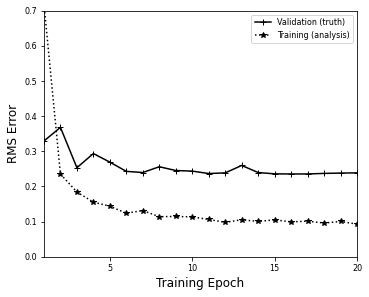

In [194]:
def training(figname=None):
    plt.rc('font', size=8)
    val_rms = np.loadtxt('Data/val_rms.txt')
    train_rms = np.loadtxt('Data/train_rms.txt')
    plt.plot(range(1,21),val_rms,'k+-',label='Validation (truth)')
    plt.plot(range(1,21),train_rms,'k*:',label='Training (analysis)')
    plt.xticks([5,10,15,20])
    plt.xlim(1,20)
    plt.ylim([0,.7])
    plt.legend()
    plt.xlabel('Training Epoch',fontsize=12)
    plt.ylabel('RMS Error',fontsize=12)
    plt.gcf().set_size_inches(minfigsize[0]*1.5,minfigsize[1])
    if figname is not None:
        plt.savefig(figname)
training('training.png')

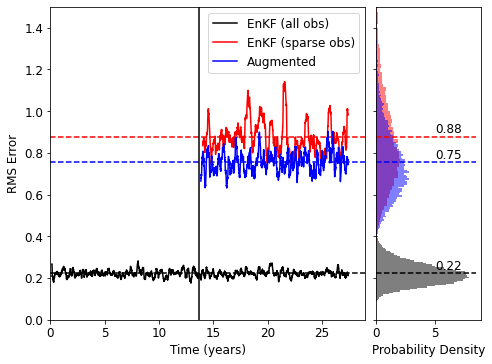

In [3]:
def rmscompare(figname=None):
    plt.rc('font', size=12)

    with open('Data/a_base.pickle','rb') as f:
        hybrid = pickle.load(f)
    with open('Data/sparse_base.pickle','rb') as f:
        sparse = pickle.load(f)
    with open('Data/base.pickle','rb') as f:
        base = pickle.load(f)

    fig = plt.figure(figsize=[8,5])
    gs = fig.add_gridspec(1, 2,  width_ratios=(3, 1),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)
    ax = fig.add_subplot(gs[0, 0])
    ax_histy = fig.add_subplot(gs[0, 1], sharey=ax)

    rmse = rms(base.ds.xx,base.ds.xaens.mean(axis=1))
    rmse = rmse.assign_coords({'yrs':('time',(5*rmse.time/365).data)})
    rmse.rolling(time=240).mean().plot.line(x='yrs',color='k',label='EnKF (all obs)',ax=ax)
    rms_means = [float(rmse.mean())]
    rmse.plot.hist(ax=ax_histy,bins=100,density=True,alpha=0.5,color='k',orientation='horizontal',histtype='stepfilled')

    rmse = rms(sparse.ds.xx,sparse.ds.xaens.mean(axis=1))
    rmse = rmse[rmse>0]
    rmse = rmse.assign_coords({'yrs':('time',(5*rmse.time/365).data)})
    rmse.rolling(time=240).mean().plot.line(x='yrs',color='r',label='EnKF (sparse obs)',ax=ax)
    rms_means.append(float(rmse.mean()))
    rmse.plot.hist(ax=ax_histy,bins=200,density=True,alpha=0.5,color='r',orientation='horizontal',histtype='stepfilled')

    rmse = rms(hybrid.ds.xx,hybrid.ds.xaens.mean(axis=1))
    rmse = rmse[rmse>0]
    rmse = rmse.assign_coords({'yrs':('time',(5*rmse.time/365).data)})
    rmse.rolling(time=240).mean().plot.line(x='yrs',color='b',label='Augmented',ax=ax)
    rmse.plot.hist(ax=ax_histy,bins=200,density=True,alpha=0.5,color='b',orientation='horizontal',histtype='stepfilled')
    rms_means.append(float(rmse.mean()))
    plt.sca(ax)
    plt.xlabel('Time (years)')
    plt.ylabel('RMS Error')
    plt.xlim([0,29])
    ax.legend()
    ax.hlines(rms_means,xmin=0,xmax=29,colors=['k','r','b'],linestyles=['--'])
    for val in rms_means:
        ax_histy.text(5,val+.02,"{:.2f}".format(val))
    plt.vlines(float(rmse.yrs.max())/2,0,1.5,colors='k',linestyles='-')
    plt.ylim([0,1.5])
    plt.xlim([0,29])
    ax_histy.tick_params(axis="y", labelleft=False)
    ax_histy.hlines(rms_means[1],0,8.5,colors='r',linestyles='--')
    ax_histy.hlines(rms_means[2],0,8.5,colors='b',linestyles='--')
    ax_histy.hlines(rms_means[0],0,8.5,colors='k',linestyles='--')
    plt.sca(ax_histy)
    plt.xlabel('Probability Density',fontsize=12)
    #plt.gcf().set_size_inches(maxfigsize[0],maxfigsize[1]*.5)
    plt.gcf().set_size_inches(maxfigsize[0],maxfigsize[1]*.6)
    if figname is not None:
        plt.savefig(figname)
rmscompare()

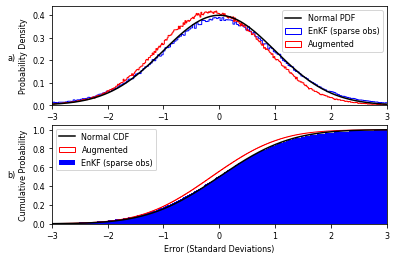

In [192]:
def errordist(figname=None):

    plt.rc('font', size=8)
    with open('Data/sparse_base.pickle','rb') as f:
        sparse = pickle.load(f)
    with open('Data/a_base.pickle','rb') as f:
        hybrid = pickle.load(f)
    plt.subplots(2,1)
    plt.subplot(2,1,1)
    x=np.linspace(-5,5,500)
    plt.plot(x,scipy.stats.norm.pdf(x),'k',label='Normal PDF')

    err = sparse.ds.xx-sparse.ds.xaens.mean(axis=1)
    err = err/sparse.ds.xaens.std(axis=1)
    err = -err
    err.plot.hist(bins=1250,density=True,histtype='step',color='b',label='EnKF (sparse obs)')

    err = hybrid.ds.xx-hybrid.ds.xaens.mean(axis=1)
    err = err/hybrid.ds.xaens.std(axis=1)
    err = -err
    err.plot.hist(bins=1000,density=True,histtype='step',color='r',label='Augmented')
    plt.xlim([-3,3])
    plt.ylabel('Probability Density')
    plt.legend()
    plt.text(-3.8,.2,'a)')


    plt.subplot(2,1,2)
    x=np.linspace(-5,5,500)
    plt.plot(x,scipy.stats.norm.cdf(x),'k',label='Normal CDF')

    err = hybrid.ds.xx-hybrid.ds.xaens.mean(axis=1)
    err = err/hybrid.ds.xaens.std(axis=1)
    err = -err
    err.plot.hist(bins=1000,density=True,histtype='step',color='r',label='Augmented',cumulative=True)

    err = sparse.ds.xx-sparse.ds.xaens.mean(axis=1)
    err = err/sparse.ds.xaens.std(axis=1)
    err = -err
    err.plot.hist(bins=1250,density=True,histtype='bar',color='b',label='EnKF (sparse obs)',cumulative=True)
    plt.xlim([-3,3])
    plt.text(-3.8,.5,'b)')
    plt.ylabel('Cumulative Probability')
    plt.xlabel('Error (Standard Deviations)')
    plt.legend()

    if figname is not None:
        plt.savefig(figname)
errordist('errordist.png')

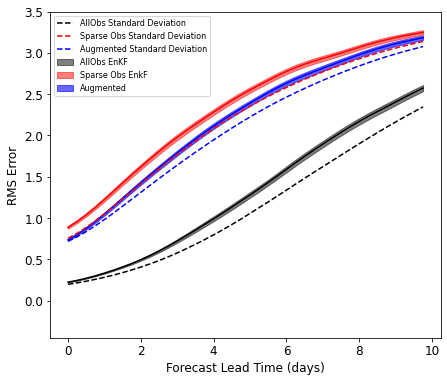

In [198]:
def forecast(figname=None):
    plt.rc('font', size=12)
    zscore = 1.96
    tmax = 3
    ret_enkf = np.load('Data/sparse_errors_1000.npy')
    ret_nn = np.load('Data/nn_errors_1000.npy')
    ret_base = np.load('Data/dense_errors.npy')
    npts = ret_enkf.shape[0]
    sparse_rms = np.sqrt((ret_enkf.mean(axis=2)**2).sum(axis=2)/40).mean(axis=0)
    sparse_stdev = np.sqrt((ret_enkf.mean(axis=2)**2).sum(axis=2)/40).std(axis=0)
    nn_rms = np.sqrt((ret_nn.mean(axis=2)**2).sum(axis=2)/40).mean(axis=0)
    nn_stdev = np.sqrt((ret_nn.mean(axis=2)**2).sum(axis=2)/40).std(axis=0)
    dense_rms = np.sqrt((ret_base.mean(axis=2)**2).sum(axis=2)/40).mean(axis=0)
    dense_stdev = np.sqrt((ret_base.mean(axis=2)**2).sum(axis=2)/40).std(axis=0)

    ti = np.arange(0.0, tmax,0.05)
    tplotmax = 2
    idx = int(len(ti)*tplotmax/tmax)

    plt.fill_between(ti[:idx]*5,dense_rms[:idx]+zscore*dense_stdev[:idx]/np.sqrt(npts),dense_rms[:idx]-zscore*dense_stdev[:idx]/np.sqrt(npts),color='k',label='AllObs EnKF',alpha=.5)
    plt.plot(ti[:idx]*5,dense_rms[:idx],'k')

    plt.fill_between(ti[:idx]*5,sparse_rms[:idx]+zscore*sparse_stdev[:idx]/np.sqrt(npts),sparse_rms[:idx]-zscore*sparse_stdev[:idx]/np.sqrt(npts),color='r',label='Sparse Obs EnkF',alpha=.5)
    plt.plot(ti[:idx]*5,sparse_rms[:idx],'-r')
    plt.fill_between(ti[:idx]*5,nn_rms[:idx]+zscore*nn_stdev[:idx]/np.sqrt(npts),nn_rms[:idx]-zscore*nn_stdev[:idx]/np.sqrt(npts),color='b',label='Augmented',alpha=.6)
    plt.plot(ti[:idx]*5,nn_rms[:idx],'-b')

    plt.plot(ti[:idx]*5,ret_base.std(axis=2).mean(axis=0).mean(axis=1)[:idx],'--k',label='AllObs Standard Deviation')
    plt.plot(ti[:idx]*5,ret_enkf.std(axis=2).mean(axis=0).mean(axis=1)[:idx],'--r',label='Sparse Obs Standard Deviation')
    plt.plot(ti[:idx]*5,ret_nn.std(axis=2).mean(axis=0).mean(axis=1)[:idx],'--b',label='Augmented Standard Deviation')
    plt.xlabel('Forecast Lead Time (days)')
    plt.ylabel('RMS Error')
    #plt.legend(bbox_to_anchor=(.55, .375), loc='upper left', borderaxespad=0,fontsize=8)
    plt.legend(fontsize=8)
    plt.gcf().set_size_inches(maxfigsize[0]*.9,maxfigsize[1]*.6)
    plt.gcf().set_size_inches(7,6)
    plt.ylim([-.45,3.5])
    if figname is not None:
        plt.savefig(figname)

forecast('forecast.png')

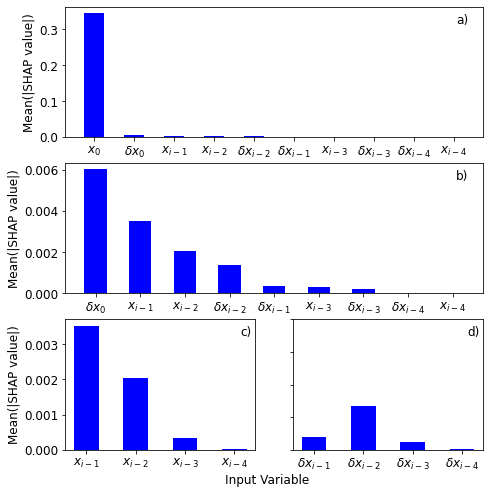

In [203]:
def shap_plot_5(figname=None):
    plt.rc('font', size=12)
    plt.subplots(3,1)
    plt.subplot(3,1,1)
    shapvals = np.loadtxt('Data/shapvals.txt')
    shapvals = np.abs(shapvals).mean(axis=0)
    names=['$x_{0}$','$x_{i-1}$','$x_{i-2}$','$x_{i-3}$','$x_{i-4}$',r'$\delta x_{0}$',r'$\delta x_{i-1}$',r'$\delta x_{i-2}$',r'$\delta x_{i-3}$',r'$\delta x_{i-4}$']
    lst = [x for _, x in sorted(zip(shapvals,names))]
    lst.reverse()
    shapvals.sort()
    shapvals = shapvals[::-1]
    bars = plt.bar(lst,shapvals,width=.5,color='b')
    plt.ylabel('Mean(|SHAP value|)')
    plt.text(.95,.9, 'a)', horizontalalignment='center',
     verticalalignment='center', transform=plt.gca().transAxes)
    plt.subplot(3,1,2)
    bars = plt.bar(lst[1:],shapvals[1:],width=.5,color='b')
    plt.ylabel('Mean(|SHAP value|)')
    plt.subplot(3,1,2)
    shapvals = np.loadtxt('Data/shapvals.txt')
    shapvals = np.abs(shapvals).mean(axis=0)
    names=['$x_{0}$','$x_{i-1}$','$x_{i-2}$','$x_{i-3}$','$x_{i-4}$',r'$\delta x_{0}$',r'$\delta x_{i-1}$',r'$\delta x_{i-2}$',r'$\delta x_{i-3}$',r'$\delta x_{i-4}$']
    bars = plt.bar(names[6:],shapvals[6:],width=.5,color='b')
    #plt.gca().invert_yaxis()
    #plt.gca().bar_label(bars, fmt='%.2e')
    #plt.xlim([0,0.015])
    plt.ylabel('Mean(|SHAP value|)')
    #plt.title('SHAP Values')
    plt.text(.95,.9, 'b)', horizontalalignment='center',
     verticalalignment='center', transform=plt.gca().transAxes)

    plt.subplot(3,2,5)
    shapvals = np.loadtxt('Data/shapvals.txt')
    shapvals = np.abs(shapvals).mean(axis=0)
    names=['$x_{0}$','$x_{i-1}$','$x_{i-2}$','$x_{i-3}$','$x_{i-4}$',r'$\delta x_{0}$',r'$\delta x_{i-1}$',r'$\delta x_{i-2}$',r'$\delta x_{i-3}$',r'$\delta x_{i-4}$']
    bars = plt.bar(names[1:5],shapvals[1:5],width=.5,color='b')
    #plt.gca().invert_yaxis()
    #plt.gca().bar_label(bars, fmt='%.2e')
    #plt.xlim([0,0.015])
    plt.ylabel('Mean(|SHAP value|)')
    plt.text(.95,.9, 'c)', horizontalalignment='center',
     verticalalignment='center', transform=plt.gca().transAxes)
    plt.xlabel(' '*55+'Input Variable')
    plt.subplot(3,2,6)
    shapvals = np.loadtxt('Data/shapvals.txt')
    shapvals = np.abs(shapvals).mean(axis=0)
    names=['$x_{0}$','$x_{i-1}$','$x_{i-2}$','$x_{i-3}$','$x_{i-4}$',r'$\delta x_{0}$',r'$\delta x_{i-1}$',r'$\delta x_{i-2}$',r'$\delta x_{i-3}$',r'$\delta x_{i-4}$']
    bars = plt.bar(names[6:],shapvals[6:],width=.5,color='b')
    #plt.gca().invert_yaxis()
    #plt.gca().bar_label(bars, fmt='%.2e')
    #plt.xlim([0,0.015])
    #plt.title('SHAP Values')
    plt.text(.95,.9, 'd)', horizontalalignment='center',
     verticalalignment='center', transform=plt.gca().transAxes)
    plt.ylim([0,0.004])
    plt.gca().yaxis.set_ticklabels([])
    plt.gcf().set_size_inches([maxfigsize[0],maxfigsize[1]*.9])
    if figname is not None:
        plt.savefig(figname)
shap_plot_5('shap.png')

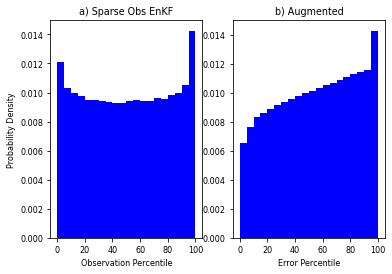

In [191]:
def rankhist(figname=None):
    plt.rc('font', size=8)
    ranks_enkf = []
    ranks_nn = []
    with open('Data/sparse_base.pickle','rb') as f:
        sparse = pickle.load(f)
    with open('Data/a_base.pickle','rb') as f:
        hybrid = pickle.load(f)
    xaens = sparse.ds.xaens[:,:,20000::2].data
    xx = sparse.ds.xx.data[:,20000::2].data
    for i in range(xaens.shape[2]):
        for j in range(xaens.shape[0]):
            val = scipy.stats.percentileofscore(xaens[j,:,i],xx[j,i])
            ranks_enkf.append(val)

    xaens = hybrid.ds.xaens[:,:,20000:].data
    xx = hybrid.ds.xx.data[:,20000:].data
    for i in range(xaens.shape[2]):
        for j in range(xaens.shape[0]):
            val = scipy.stats.percentileofscore(xaens[j,:,i],xx[j,i])
            ranks_nn.append(val)

    plt.subplots(1,2)
    plt.subplot(1,2,1)
    plt.title('a) Sparse Obs EnKF')
    plt.hist(ranks_enkf,bins=20,color='b',density=True)
    plt.ylabel('Probability Density')
    plt.xlabel('Observation Percentile')
    plt.subplot(1,2,2)
    plt.hist(ranks_nn,bins=20,color = 'b',density=True)
    plt.xlabel('Error Percentile')
    plt.title('b) Augmented')
    if figname is not None:
        plt.savefig(figname)
rankhist('rankhist.png')